<a href="https://colab.research.google.com/github/fizza49/IMDB-Movie-Review-Sentiment-Analysis/blob/main/IMDB_Movie_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author: Fizza Kashif**

**ID: STU-DS-251-242**

# **TASK 5**
# **IMDB Movie Reviews Sentiment Analysis**

**Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re




**Imorting the IMDB Movie Dataset**

In [ ]:
df=pd.read_csv("/content/IMDB Dataset.csv",on_bad_lines='skip',quoting=0)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

# **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(49581, 2)

No missing values values but  419 duplicate values. Dropped the duplicate values.

**Visulaization of the sentiment distribution**

/tmp/ipython-input-144885459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df,palette='Set3')


Text(0, 0.5, 'Count')

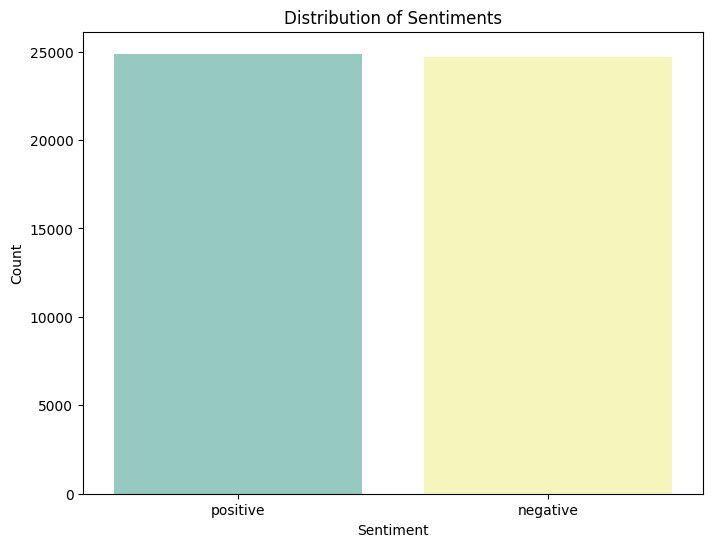

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=df,palette='Set3')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

Text(0, 0.5, '')

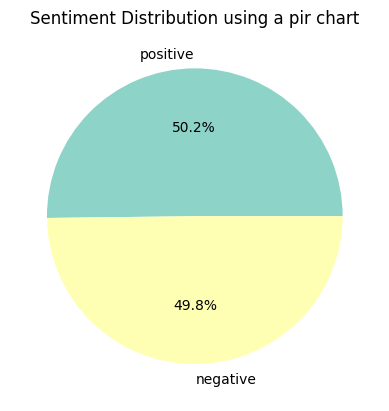

In [ ]:
count= df['sentiment'].value_counts()
count.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3', len(count)))
plt.title('Sentiment Distribution using a pir chart')
plt.ylabel('')


# **Data Preprocessing**

In [ ]:
df['sentiment'] = df['sentiment'].map({'positive': 0, 'negative': 1})

In [ ]:
df['sentiment']

,sentiment
0,0
1,0
2,0
3,1
4,0
...,...
49995,0
49996,1
49997,1
49998,1


In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
def preprocess_text(text):
    # 1. Remove punctuation & special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 2. Convert to lowercase
    text = text.lower()

    # 3. Tokenize
    words = nltk.word_tokenize(text)

    # 4. Remove stopwords
    words = [word for word in words if word not in stop_words]

    # 5. Rejoin and clean extra spaces
    text = " ".join(words)
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [ ]:
df['review'] = df['review'].apply(preprocess_text)


In [ ]:
print(df['review'])

0        one reviewers mentioned watching oz episode yo...
1        wonderful little production br br filming tech...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 49581, dtype: object


# **Splitting the data in training and testing**

In [ ]:
X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **TF-IDF Vectorization**

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# **Model Training**

In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

# **Model Evaluation**

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4922
           1       0.86      0.84      0.85      4995

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



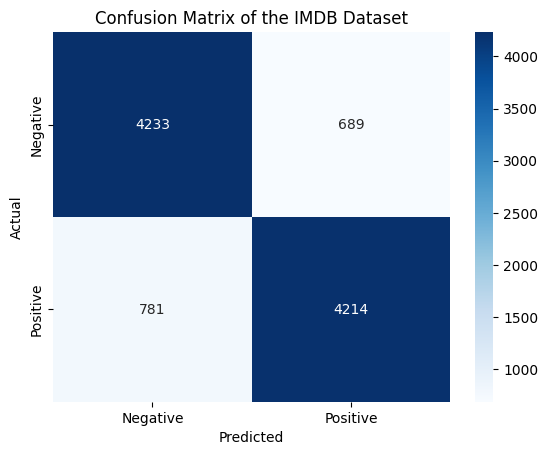

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix of the IMDB Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
cm

array([[4233,  689],
       [ 781, 4214]])

# **Model Performance and Evaluation:**
**Model Performance**

**Accuracy:** 0.85 which means that the model correctly predicts sentimnets 85% of the time.

**Precision, Recall, and F1-Score:**

1. **Precision** (Positive = 0.86): When the model predicts that a review is positive, it’s correct 86% of the time.

2. **Recall** (Positive = 0.84): Out of all actual positive reviews, the model correctly identifies 84%.

3. **F1-score** (Balanced = 0.85): Strong balance between precision and recall for both classes.

**Confusion Matrix:**

|                  | Predicted Negative | Predicted Positive |
|------------------|--------------------|--------------------|
| **Actual Negative** | 4233               | 689                |
| **Actual Positive** | 781                | 4214               |


True Negatives (4233): Correctly identified negative reviews.

True Positives (4214): Correctly identified positive reviews.

False Negatives (781): Positive reviews incorrectly predicted as negative.

False Positives (689): Negative reviews incorrectly predicted as positive.

**Insights:**

The model performs equally well on both positive and negative classes but there is a slight tendency to misclassify positives as negatives (781 vs 689).

Overall, very balanced performance, suitable for sentiment classification. The model achieves 85% accuracy with balanced precision, recall, and F1-scores across both sentiment classes. It is reliable for sentiment analysis tasks on large review datasets.

# **Top Most important words**

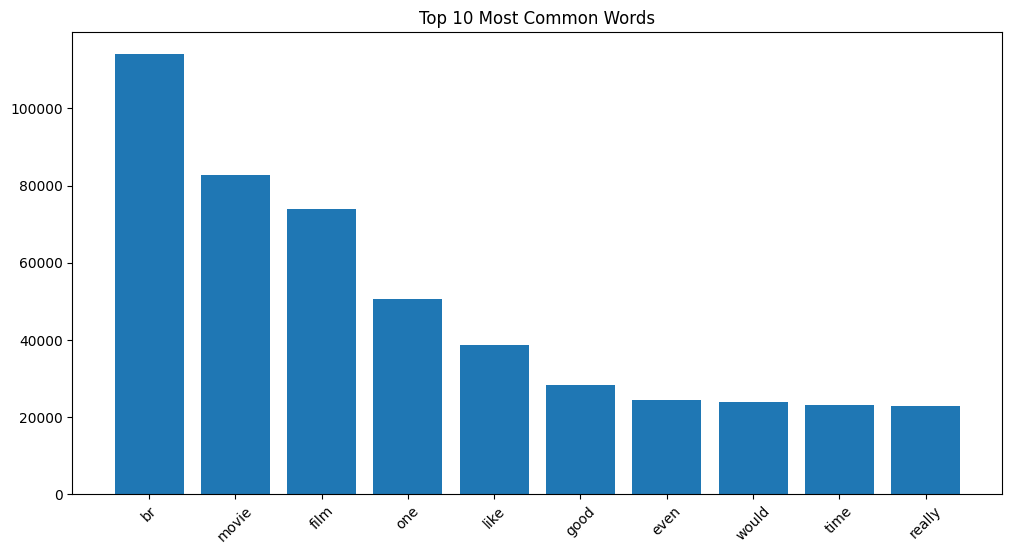

In [ ]:
from collections import Counter

# Combine all reviews into one big string
all_words = " ".join(df['review']).split()

# Count frequencies
word_freq = Counter(all_words)

# Get top 10 most common
top_words = word_freq.most_common(10)

# Separate words and counts
words, counts = zip(*top_words)

# Plot
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Words")
plt.show()


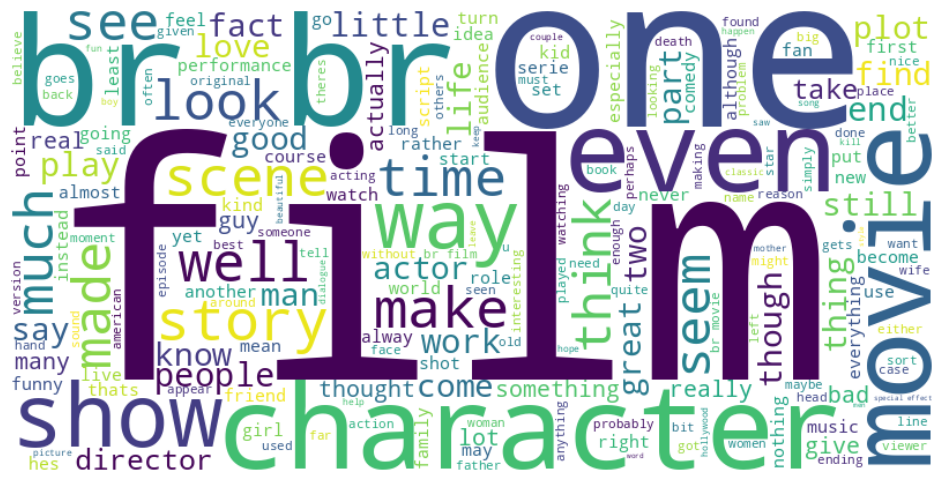

In [ ]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
# Get the most important words that contribute to positive and negative sentiments
# Get feature names from TF-IDF
feature_names = tfidf.get_feature_names_out()

# Get log probabilities per class
log_probs = model.feature_log_prob_

# For class 0 (negative)
top_negative_indices = log_probs[0].argsort()[-10:]   # top 10
top_negative = [(feature_names[i], log_probs[0][i]) for i in top_negative_indices]

# For class 1 (positive)
top_positive_indices = log_probs[1].argsort()[-10:]   # top 10
top_positive = [(feature_names[i], log_probs[1][i]) for i in top_positive_indices]

print("Top Positive Words:", top_positive)
print("Top Negative Words:", top_negative)


Top Positive Words: [('really', np.float64(-5.877239154922511)), ('would', np.float64(-5.818926831627981)), ('good', np.float64(-5.789017486690272)), ('even', np.float64(-5.72850308328987)), ('bad', np.float64(-5.539234999127975)), ('like', np.float64(-5.533125904763774)), ('one', np.float64(-5.506939040909449)), ('film', np.float64(-5.152823822783947)), ('movie', np.float64(-4.822159053286857)), ('br', np.float64(-4.747308259388312))]
Top Negative Words: [('well', np.float64(-5.939709375471192)), ('see', np.float64(-5.890543346207582)), ('story', np.float64(-5.839956790009417)), ('like', np.float64(-5.759230648773448)), ('good', np.float64(-5.752795079587357)), ('great', np.float64(-5.660174604850006)), ('one', np.float64(-5.485396726851074)), ('film', np.float64(-5.050378175795854)), ('movie', np.float64(-5.043567068410109)), ('br', np.float64(-4.819439250744811))]


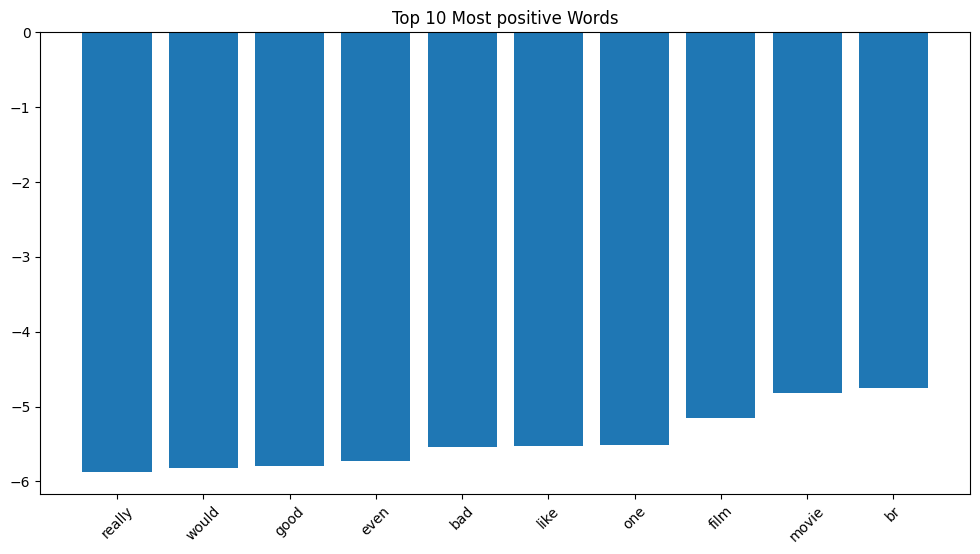

In [ ]:
words, scores = zip(*top_positive)
scores = [-s for s in scores]

plt.figure(figsize=(12,6))
top_positive, counts = zip(*top_positive)
plt.bar(top_positive, counts)
plt.xticks(rotation=45)
plt.title("Top 10 Most positive Words")
plt.show()


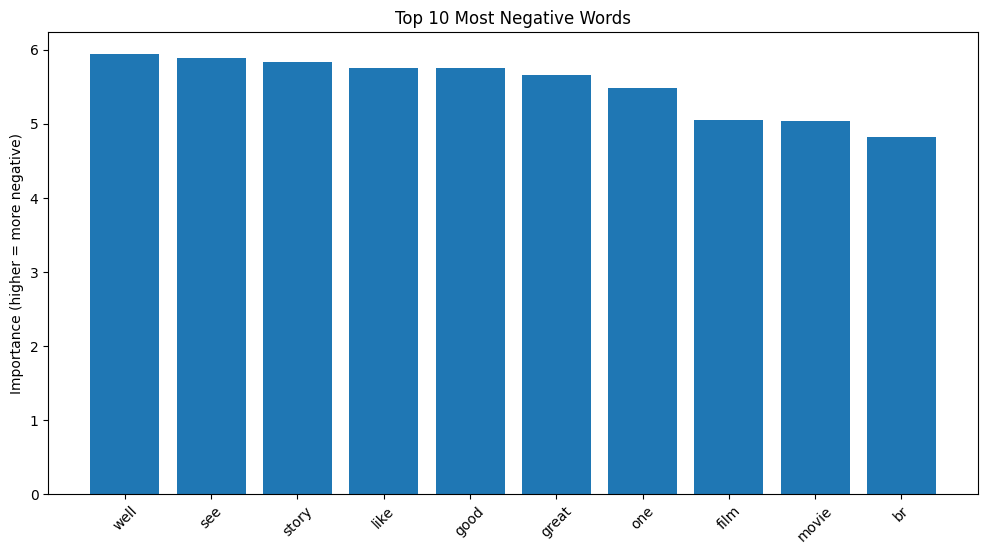

In [ ]:

words, scores = zip(*top_negative)
scores = [-s for s in scores]

plt.figure(figsize=(12,6))
plt.bar(words, scores)
plt.xticks(rotation=45)
plt.title("Top 10 Most Negative Words")
plt.ylabel("Importance (higher = more negative)")
plt.show()

In [ ]:
import joblib

# Save model
joblib.dump(model, "sentiment_model.pkl")

# Save TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

# **Report**
**Approach**
1.  **Data Preprocessing**

* Cleaned review text by removing punctuation, special characters, numbers, and converting to lowercase.
* Removed stopwords to reduce noise.
* Tokenized the text for feature extraction.
* Tested to Lemmitization but due to dataset size (~50,000 reviews), lighter preprocessing was preferred for efficiency.

2. **Feature Engineering**

Used TF-IDF vectorization to convert text into numerical features, capturing the importance of words across documents.

3. **Model Training**

Trained a Multinomial Naïve Bayes classifier for sentiment classification (positive vs. negative).

4. **Evaluation**

* Measured performance using accuracy, precision, recall, and F1-score.

* Extracted top words contributing to positive and negative predictions for interpretability.

* Visualized frequent words for better understanding of the model.

5. **Results**

* Accuracy: 85%

* Precision, Recall, and F1-Score were well balanced across both positive and negative classes (0.85 each).

* Confusion Matrix showed the model performs almost equally well at identifying positive and negative reviews, with slightly more false negatives than false positives.

* Top Word Analysis revealed words like “good”, “movie”, and “great” contributed to positive predictions, while “bad”, “boring”, and “worst” influenced negative predictions.

The final model demonstrates robust and balanced performance, achieving 85% accuracy on unseen reviews. It effectively distinguishes between positive and negative sentiments and provides interpretable insights through word importance analysis. This makes it a reliable tool for large-scale sentiment analysis tasks.